### We will perform some exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') #ignor warnings

from sklearn.preprocessing import MinMaxScaler #for normalizatio

In [2]:
dr = pd.read_csv("Google_Stock.csv")
dr.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


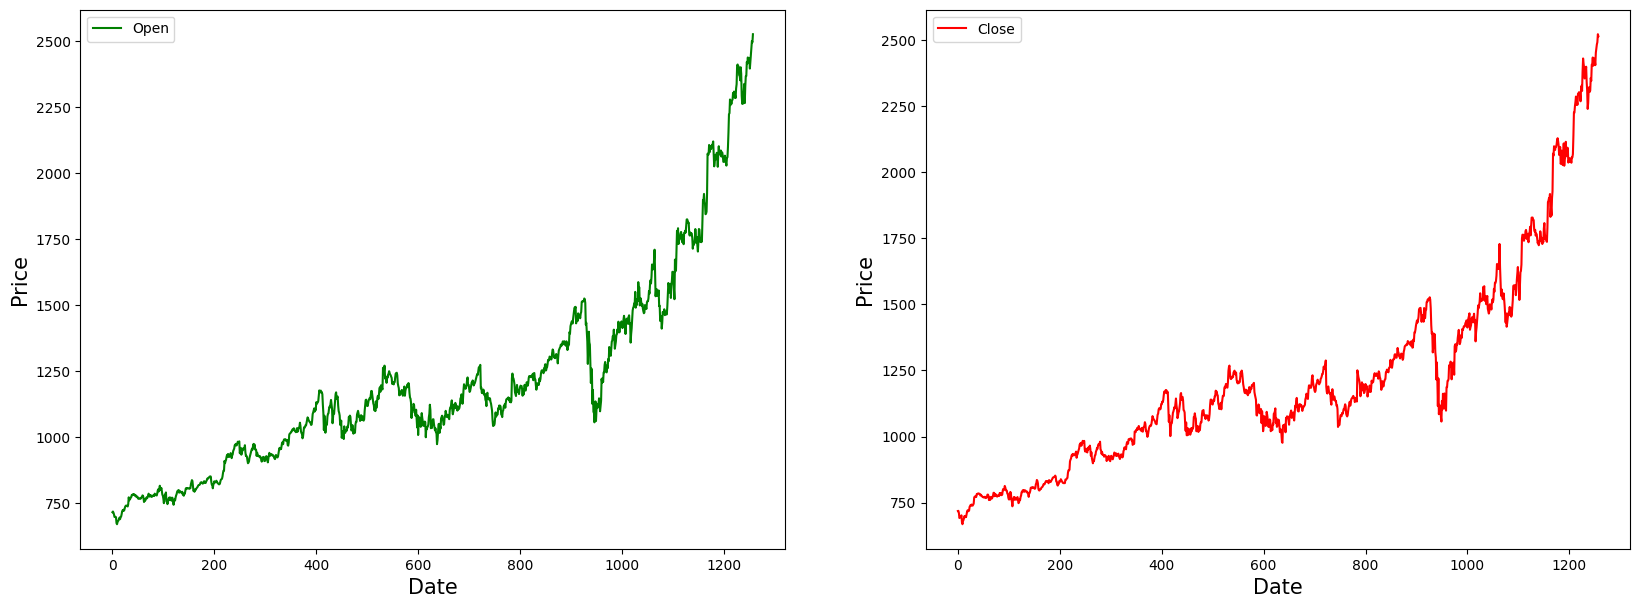

In [3]:
#plotting open and closing price on date index
fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(dr['open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(dr['close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fig.show()

In [4]:
dr.drop(['symbol' , 'divCash' , 'splitFactor'] , axis = 1 , inplace = True)

In [5]:
dr["date"] = pd.to_datetime(dr["date"])
dr["Year"] = dr["date"].dt.year


In [6]:
dr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   date       1258 non-null   datetime64[ns, UTC]
 1   close      1258 non-null   float64            
 2   high       1258 non-null   float64            
 3   low        1258 non-null   float64            
 4   open       1258 non-null   float64            
 5   volume     1258 non-null   int64              
 6   adjClose   1258 non-null   float64            
 7   adjHigh    1258 non-null   float64            
 8   adjLow     1258 non-null   float64            
 9   adjOpen    1258 non-null   float64            
 10  adjVolume  1258 non-null   int64              
 11  Year       1258 non-null   int32              
dtypes: datetime64[ns, UTC](1), float64(8), int32(1), int64(2)
memory usage: 113.2 KB


In [7]:
dr[dr.isnull().any(axis=1)]

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,Year


In [8]:
dr.isnull().sum()

date         0
close        0
high         0
low          0
open         0
volume       0
adjClose     0
adjHigh      0
adjLow       0
adjOpen      0
adjVolume    0
Year         0
dtype: int64

In [9]:
dr.columns

Index(['date', 'close', 'high', 'low', 'open', 'volume', 'adjClose', 'adjHigh',
       'adjLow', 'adjOpen', 'adjVolume', 'Year'],
      dtype='object')

In [10]:
dr[['close', 'high', 'low', 'open', 'volume', 'adjClose', 'adjHigh',
       'adjLow', 'adjOpen', 'adjVolume', 'Year']] = dr[['close', 'high', 'low', 'open', 'volume', 'adjClose', 'adjHigh',
       'adjLow', 'adjOpen', 'adjVolume', 'Year']].astype(float)

In [11]:
dr.head(10)

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,Year
0,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065.0,718.27,722.47,713.1200,716.48,1306065.0,2016.0
1,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517.0,718.92,722.98,717.3100,719.00,1214517.0,2016.0
2,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471.0,710.36,716.65,703.2600,714.91,1982471.0,2016.0
3,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357.0,691.72,708.82,688.4515,708.65,3402357.0,2016.0
4,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538.0,693.71,702.48,693.4100,698.77,2082538.0,2016.0
5,2016-06-21 00:00:00+00:00,695.94,702.77,692.0100,698.40,1465634.0,695.94,702.77,692.0100,698.40,1465634.0,2016.0
6,2016-06-22 00:00:00+00:00,697.46,700.86,693.0819,699.06,1184318.0,697.46,700.86,693.0819,699.06,1184318.0,2016.0
7,2016-06-23 00:00:00+00:00,701.87,701.95,687.0000,697.45,2171415.0,701.87,701.95,687.0000,697.45,2171415.0,2016.0
8,2016-06-24 00:00:00+00:00,675.22,689.40,673.4500,675.17,4449022.0,675.22,689.40,673.4500,675.17,4449022.0,2016.0
9,2016-06-27 00:00:00+00:00,668.26,672.30,663.2840,671.00,2641085.0,668.26,672.30,663.2840,671.00,2641085.0,2016.0


In [12]:
cols_to_drop = [
    "adjClose", "adjOpen", "adjHigh", "adjLow", "adjVolume"
]
dr = dr.drop(columns = cols_to_drop)

In [13]:

dr.head(10)


,date,close,high,low,open,volume,Year
0,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065.0,2016.0
1,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517.0,2016.0
2,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471.0,2016.0
3,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357.0,2016.0
4,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538.0,2016.0
5,2016-06-21 00:00:00+00:00,695.94,702.77,692.0100,698.40,1465634.0,2016.0
6,2016-06-22 00:00:00+00:00,697.46,700.86,693.0819,699.06,1184318.0,2016.0
7,2016-06-23 00:00:00+00:00,701.87,701.95,687.0000,697.45,2171415.0,2016.0
8,2016-06-24 00:00:00+00:00,675.22,689.40,673.4500,675.17,4449022.0,2016.0
9,2016-06-27 00:00:00+00:00,668.26,672.30,663.2840,671.00,2641085.0,2016.0


In [14]:
dr["target_direction"] = (dr["close"].shift(-1) > dr["close"]).astype(int)
dr.head(4)


,date,close,high,low,open,volume,Year,target_direction
0,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065.0,2016.0,1
1,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517.0,2016.0,0
2,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471.0,2016.0,0
3,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357.0,2016.0,1


In [15]:
dr["target_return"] = (dr["close"].shift(-1) - dr["close"]) / dr["close"]
dr.head(5)

,date,close,high,low,open,volume,Year,target_direction,target_return
0,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065.0,2016.0,1,0.000905
1,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517.0,2016.0,0,-0.011907
2,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471.0,2016.0,0,-0.026240
3,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357.0,2016.0,1,0.002877
4,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538.0,2016.0,1,0.003215


In [16]:
dr["target_price"] = dr["close"] * (1 + dr["target_return"])
dr.head(3)


,date,close,high,low,open,volume,Year,target_direction,target_return,target_price
0,2016-06-14 00:00:00+00:00,718.27,722.47,713.12,716.48,1306065.0,2016.0,1,0.000905,718.92
1,2016-06-15 00:00:00+00:00,718.92,722.98,717.31,719.00,1214517.0,2016.0,0,-0.011907,710.36
2,2016-06-16 00:00:00+00:00,710.36,716.65,703.26,714.91,1982471.0,2016.0,0,-0.026240,691.72


In [17]:
dr = dr.dropna().reset_index(drop=True)


In [18]:
dr.head(20)

,date,close,high,low,open,volume,Year,target_direction,target_return,target_price
0,2016-06-14 00:00:00+00:00,718.27,722.4700,713.1200,716.48,1306065.0,2016.0,1,0.000905,718.92
1,2016-06-15 00:00:00+00:00,718.92,722.9800,717.3100,719.00,1214517.0,2016.0,0,-0.011907,710.36
2,2016-06-16 00:00:00+00:00,710.36,716.6500,703.2600,714.91,1982471.0,2016.0,0,-0.026240,691.72
3,2016-06-17 00:00:00+00:00,691.72,708.8200,688.4515,708.65,3402357.0,2016.0,1,0.002877,693.71
4,2016-06-20 00:00:00+00:00,693.71,702.4800,693.4100,698.77,2082538.0,2016.0,1,0.003215,695.94
5,2016-06-21 00:00:00+00:00,695.94,702.7700,692.0100,698.40,1465634.0,2016.0,1,0.002184,697.46
6,2016-06-22 00:00:00+00:00,697.46,700.8600,693.0819,699.06,1184318.0,2016.0,1,0.006323,701.87
7,2016-06-23 00:00:00+00:00,701.87,701.9500,687.0000,697.45,2171415.0,2016.0,0,-0.037970,675.22
8,2016-06-24 00:00:00+00:00,675.22,689.4000,673.4500,675.17,4449022.0,2016.0,0,-0.010308,668.26
9,2016-06-27 00:00:00+00:00,668.26,672.3000,663.2840,671.00,2641085.0,2016.0,1,0.017628,680.04


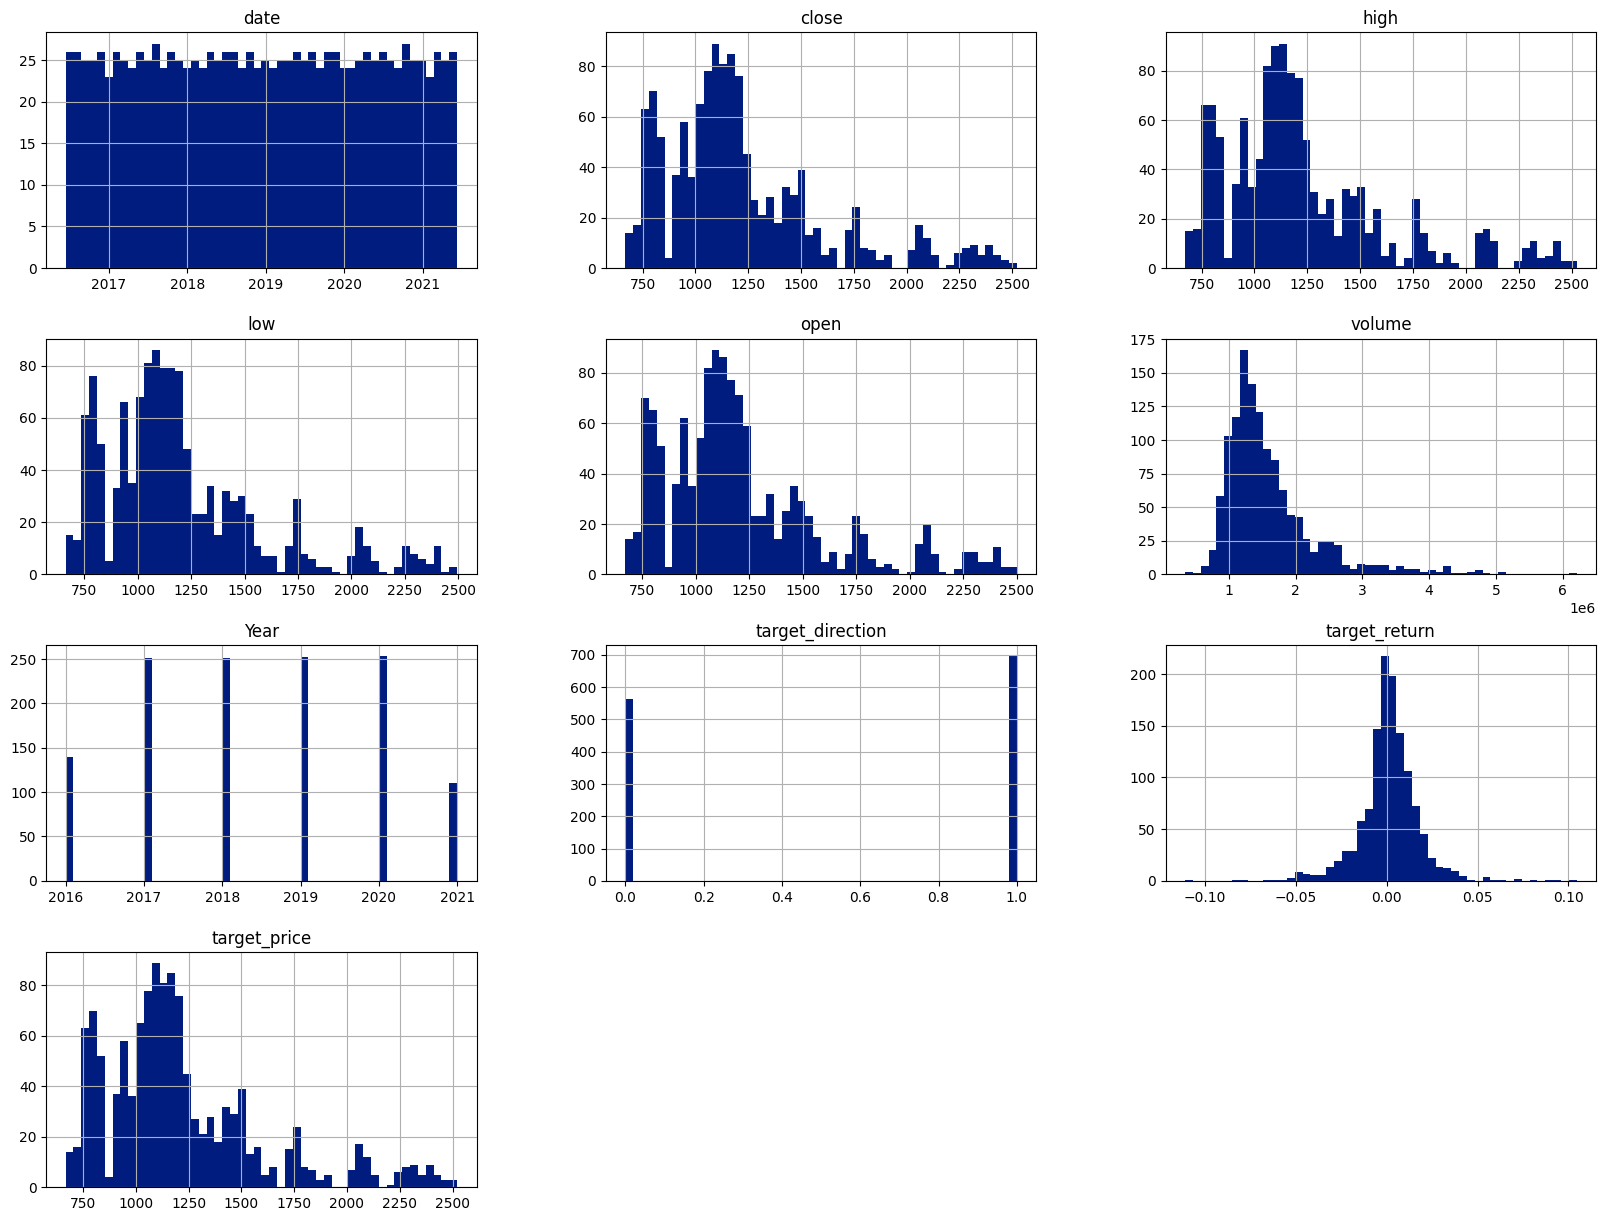

In [19]:
plt.style.use('seaborn-v0_8-dark-palette')
dr.hist(bins=50, figsize=(20,15))
plt.show()

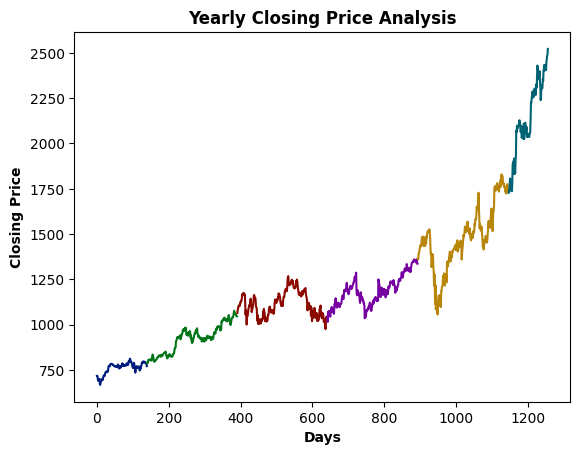

In [20]:
for year in dr["Year"].unique():
    subset = dr[dr["Year"] == year]
    plt.plot(subset.index, subset["close"], label=f'Year {int(year)+2016}')
plt.xlabel('Days' , weight='bold')
plt.ylabel('Closing Price' , weight='bold')
plt.title('Yearly Closing Price Analysis' , weight = "bold")
plt.show()

In [21]:
dr.to_csv("Google_Stock_Cleaned.csv", index=False)